# Lab 15: Tensorflow
## Sam Bacon - April 12, 2021
### Artificial neural network using Keras and Tensorflow

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
#print(tf.__version__)

In [ ]:
# load the MNIST dataset
mnist = tf.keras.datasets.mnist

# separate into train and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# preprocessing - normalization
x_train = x_train/255
x_test = x_test/255

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

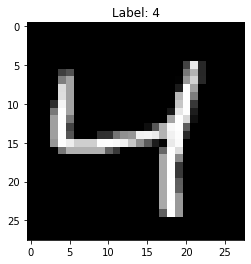

In [ ]:
# visualize one of the examples
train_idx = 2
plt.imshow(x_train[train_idx], cmap = 'gray')
plt.title('Label: {}'.format(y_train[train_idx]))
plt.show()

In [ ]:
# build the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)                            
])

In [ ]:
# predictions for first training example
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.28203875,  0.0662878 ,  0.69010305, -0.13000765, -0.34605056,
        -0.56572497,  0.19327423,  0.4687321 , -0.5403499 , -0.12962858]],
      dtype=float32)

In [ ]:
# checking outputs
print(tf.nn.softmax(predictions).numpy())
print('sum:', tf.nn.softmax(predictions).numpy().sum())

[[0.07363971 0.10432498 0.19467396 0.08573108 0.0690736  0.05545091
  0.11845076 0.15601547 0.05687598 0.08576358]]
sum: 1.0000001


In [ ]:
# loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [ ]:
# compile model
model.compile(optimizer = 'adam',
              loss = loss_fn,
              metrics = ['accuracy'])

In [ ]:
# train the model
model.fit(x_train, y_train, epochs = 2)

Epoch 1/2
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7139 - accuracy: 0.7844
Epoch 2/2
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3016 - accuracy: 0.9129


In [ ]:
# evaluate the model (training data)
model.evaluate(x_train, y_train, verbose = 2)

1875/1875 - 2s - loss: 0.1777 - accuracy: 0.9488


[0.17769888043403625, 0.9488166570663452]

In [ ]:
# evaluate the model (test data)
model.evaluate(x_test, y_test, verbose = 2)

313/313 - 0s - loss: 0.1808 - accuracy: 0.9462


[0.1807660311460495, 0.9462000131607056]

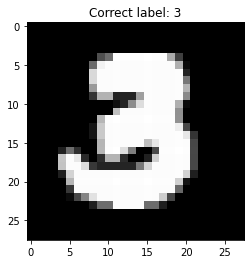

Predicted Probabilities:


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[6.9323773e-06, 8.0698970e-07, 5.5900789e-03, 9.9437201e-01,
        2.7248137e-10, 4.7445296e-06, 1.1757166e-09, 1.1961725e-07,
        2.5195088e-05, 1.0607289e-07]], dtype=float32)>

In [ ]:
# view probabilities
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

test_idx = 200
plt.imshow(x_test[test_idx], cmap = plt.cm.gray)
plt.title('Correct label: {}'.format(y_test[test_idx]))
plt.show()
print('Predicted Probabilities:')
probability_model(x_test[test_idx:test_idx+1])

Question 1:

1) The model predicted the training data with an accuracy of 0.9488 and it predicted the test data witn an accuracy of 0.9462

In [ ]:
# Experiment (increasing neurons, increasing epochs, adding an additional dense layer)

# build the neural network
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(30, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)                            
])

model2.compile(optimizer = 'adam',
              loss = loss_fn,
              metrics = ['accuracy'])

# train the model
model2.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6534 - accuracy: 0.7930
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2144 - accuracy: 0.9368
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1586 - accuracy: 0.9528
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1306 - accuracy: 0.9601
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1133 - accuracy: 0.9659
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1000 - accuracy: 0.9689
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0919 - accuracy: 0.9724
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9735
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0790 - accuracy: 0.9760
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.071

In [ ]:
# evaluate the model (training data)
model2.evaluate(x_train, y_train, verbose = 2)

1875/1875 - 1s - loss: 0.0478 - accuracy: 0.9845


[0.047830451279878616, 0.9845333099365234]

In [ ]:
# evaluate the model (test data)
model2.evaluate(x_test, y_test, verbose = 2)

313/313 - 0s - loss: 0.1095 - accuracy: 0.9705


[0.1095314472913742, 0.9704999923706055]

Question 2:

After experimenting with the changes described in the question, the highest test data accuracy I was able to achieve was 0.9705, which is slightly higher than the original model I created. It is hard for me to definitively say whether the model is overfitting, because the difference in accuracies between training data (0.9845) and test data (0.9705) is still not a huge amount. However, the difference is greater than that from the first model, which leads me to believe that the second model is overfitting more than the first model.